In [364]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
#!pip install seaborn
#!pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [365]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [366]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Code added by Taufiq 

In [367]:
#income replace with median:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [368]:
# 3. Total Number of Purchases a single customer make
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [369]:
# Applying one-hot encoding to the 'Education' categorical variable
from sklearn.preprocessing import OneHotEncoder
education_ohe = pd.get_dummies(df['Education'], prefix='Education').astype('int')

# Adding the one-hot encoded columns to the main DataFrame
df = pd.concat([df, education_ohe], axis=1)

# Displaying the first few rows to verify the new columns
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,25,0,0,1,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,6,0,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,21,0,0,1,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,8,0,0,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,19,0,0,0,0,1


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2240 non-null   int64  
 1   Year_Birth            2240 non-null   int64  
 2   Education             2240 non-null   object 
 3   Marital_Status        2240 non-null   object 
 4   Income                2240 non-null   float64
 5   Kidhome               2240 non-null   int64  
 6   Teenhome              2240 non-null   int64  
 7   Dt_Customer           2240 non-null   object 
 8   Recency               2240 non-null   int64  
 9   MntWines              2240 non-null   int64  
 10  MntFruits             2240 non-null   int64  
 11  MntMeatProducts       2240 non-null   int64  
 12  MntFishProducts       2240 non-null   int64  
 13  MntSweetProducts      2240 non-null   int64  
 14  MntGoldProds          2240 non-null   int64  
 15  NumDealsPurchases    

In [371]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.009375,3.0,11.0,0.149107,14.862054,0.090625,0.024107,0.503125,0.165179,0.216964
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.096391,0.0,0.0,0.356274,7.677173,0.287139,0.153416,0.500102,0.371425,0.412270
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.0,11.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,3.0,11.0,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,3.0,11.0,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,3.0,11.0,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000


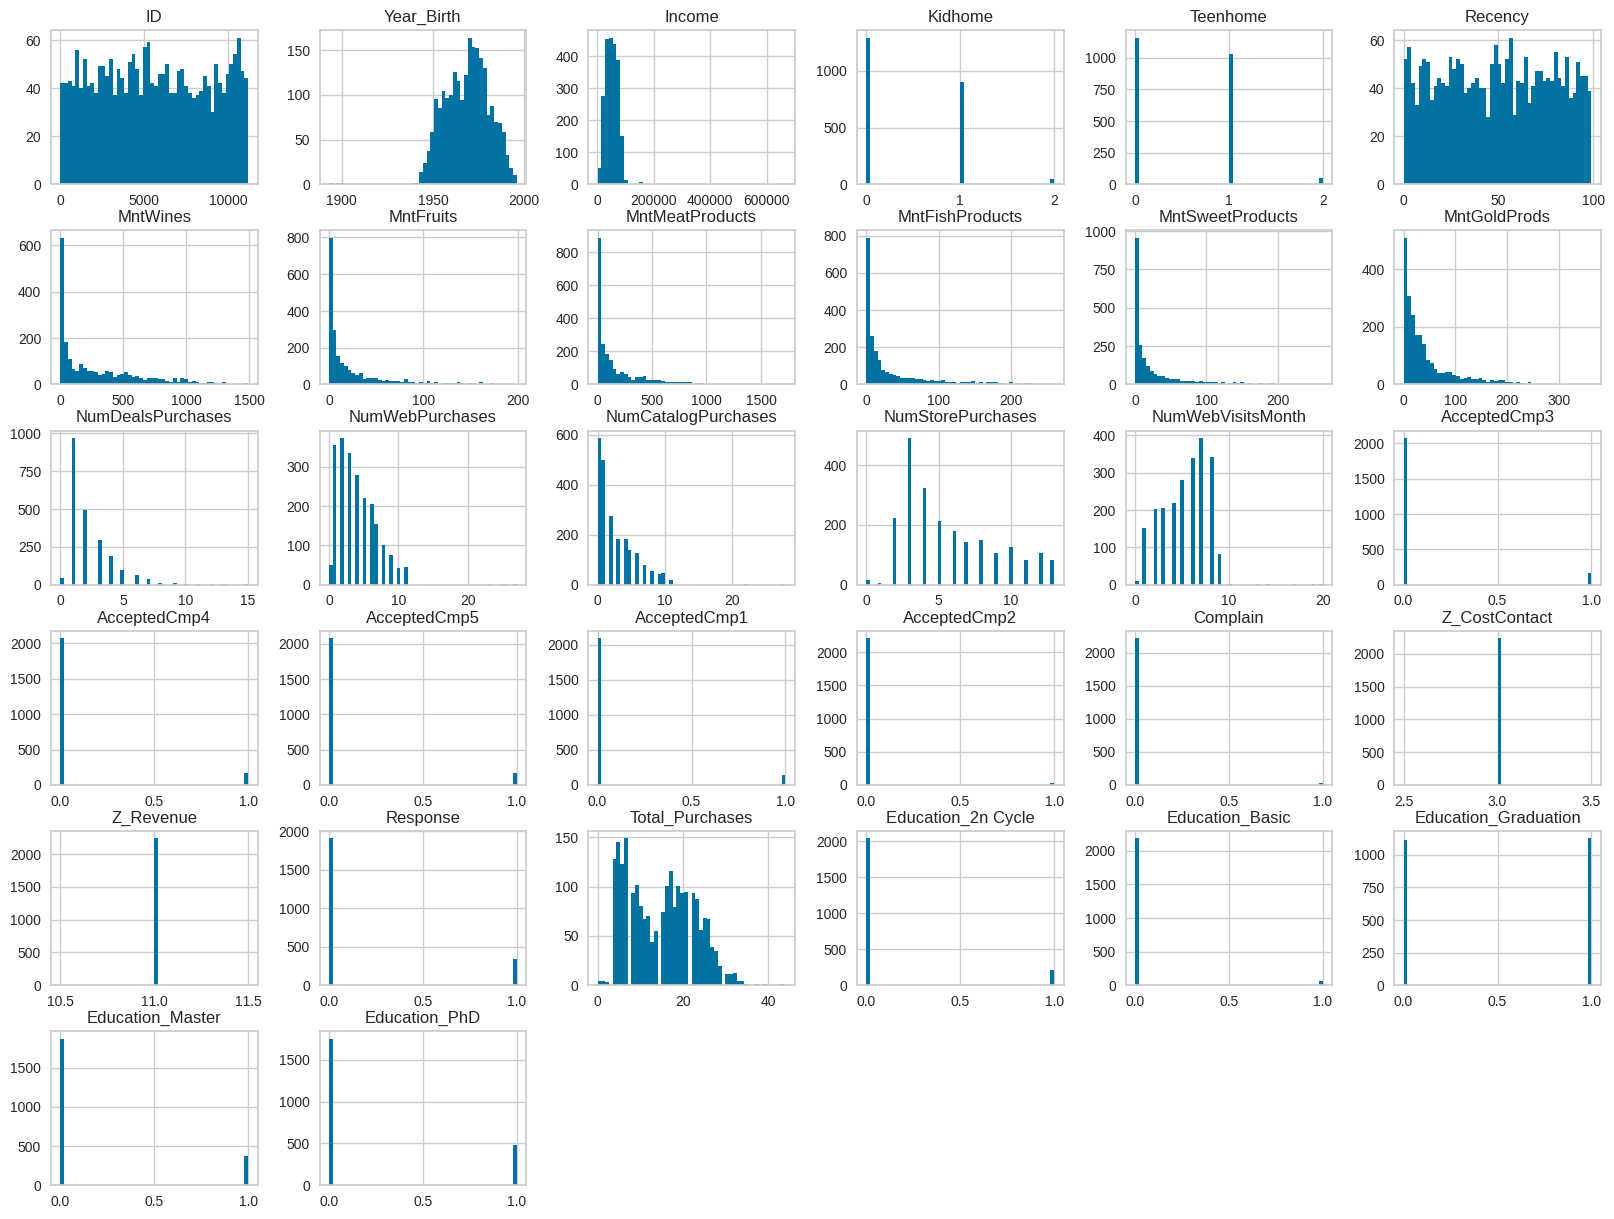

In [372]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [373]:
#corr_matrix =df.corr()
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

In [374]:
print(corr_matrix)

                            ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                    1.000000    0.000028  0.012996  0.002406 -0.002580   
Year_Birth            0.000028    1.000000 -0.160899  0.230176 -0.352111   
Income                0.012996   -0.160899  1.000000 -0.425326  0.018965   
Kidhome               0.002406    0.230176 -0.425326  1.000000 -0.036133   
Teenhome             -0.002580   -0.352111  0.018965 -0.036133  1.000000   
Recency              -0.046524   -0.019871 -0.004061  0.008827  0.016198   
MntWines             -0.022878   -0.157773  0.576903 -0.496297  0.004846   
MntFruits             0.004600   -0.017917  0.428791 -0.372581 -0.176764   
MntMeatProducts      -0.004437   -0.030872  0.577805 -0.437129 -0.261160   
MntFishProducts      -0.024475   -0.041625  0.437564 -0.387644 -0.204187   
MntSweetProducts     -0.007642   -0.018133  0.436131 -0.370673 -0.162475   
MntGoldProds         -0.013438   -0.061818  0.321938 -0.349595 -0.021725   
NumDealsPurc

In [375]:
df["Year_Birth"].value_counts()

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64

In [376]:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [377]:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [378]:
df["Kidhome"].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [379]:
df["Teenhome"].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

In [380]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Purchases         0
Education_2n Cycle      0
Education_Basic         0
Education_Graduation    0
Education_Master        0
Education_PhD           0
dtype: int64


In [381]:
df=df.dropna(subset=["Income"]) 

In [382]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Purchases         0
Education_2n Cycle      0
Education_Basic         0
Education_Graduation    0
Education_Master        0
Education_PhD           0
dtype: int64


array([[<Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='MntWines', ylabel='Income'>,
        <Axes: xlabel='MntFruits', ylabel='Income'>,
        <Axes: xlabel='MntMeatProducts', ylabel='Income'>,
        <Axes: xlabel='MntFishProducts', ylabel='Income'>,
        <Axes: xlabel='MntSweetProducts', ylabel='Income'>,
        <Axes: xlabel='MntGoldProds', ylabel='Income'>],
       [<Axes: xlabel='Income', ylabel='MntWines'>,
        <Axes: xlabel='MntWines', ylabel='MntWines'>,
        <Axes: xlabel='MntFruits', ylabel='MntWines'>,
        <Axes: xlabel='MntMeatProducts', ylabel='MntWines'>,
        <Axes: xlabel='MntFishProducts', ylabel='MntWines'>,
        <Axes: xlabel='MntSweetProducts', ylabel='MntWines'>,
        <Axes: xlabel='MntGoldProds', ylabel='MntWines'>],
       [<Axes: xlabel='Income', ylabel='MntFruits'>,
        <Axes: xlabel='MntWines', ylabel='MntFruits'>,
        <Axes: xlabel='MntFruits', ylabel='MntFruits'>,
        <Axes: xlabel='MntMeatProducts', y

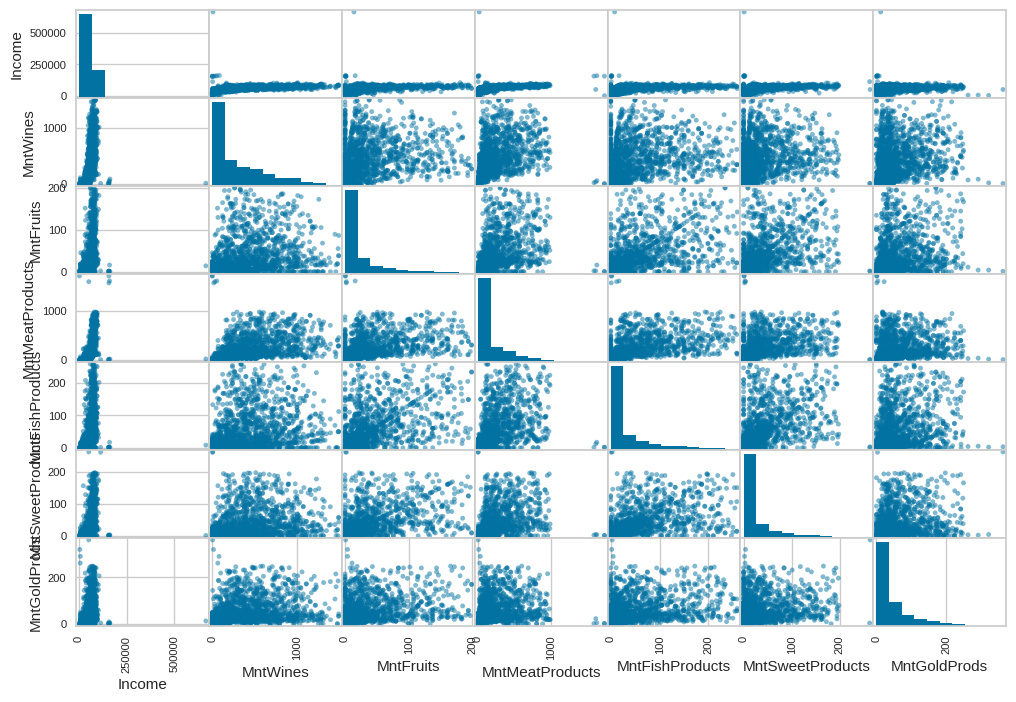

In [383]:
from pandas.plotting import scatter_matrix
attributes = ["Income", "MntWines", "MntFruits",
 "MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [384]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='mixed')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [385]:
#creation d'une feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta.days)
#Arash:
df["days_a_customer"] = days #attribute name changed: df["Customer_For"] = days
#df["days_a_customer"] = pd.to_numeric(df["days_a_customer"], errors="coerce")


In [386]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Total_Purchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,days_a_customer
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,2013-07-11 22:57:38.571428608,49.109375,303.935714,26.302232,166.950000,...,3.0,11.0,0.149107,14.862054,0.090625,0.024107,0.503125,0.165179,0.216964,512.043304
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-19 18:00:00,24.000000,23.750000,1.000000,16.000000,...,3.0,11.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,340.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,173.500000,8.000000,67.000000,...,3.0,11.0,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,513.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,3.0,11.0,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,685.250000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,3.0,11.0,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1063.000000
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.0,0.0,0.356274,7.677173,0.287139,0.153416,0.500102,0.371425,0.412270,232.229893


In [387]:
# 2020 is the oldest dataset update date. So we consider that as the analysis date
df["Age"] = 2020-df["Year_Birth"]

In [388]:
#Arash: creating marital status dictionary and replacing values in data frame?
unique_marital_strings = list(df['Marital_Status'].unique())
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [389]:
#Arash:
marital_status_dict = {'Single': 1 ,'Together': 2, 'Married': 2, 'Divorced': 1, 'Widow': 1, 'Alone': 1, 'Absurd': np.NaN, 'YOLO': np.NaN}
df['adults_in_home'] = df['Marital_Status']
df['adults_in_home'] = df['adults_in_home'].map(lambda x : marital_status_dict.get(x))

In [390]:
#Arash:
df['adults_in_home'].isnull().value_counts()

adults_in_home
False    2236
True        4
Name: count, dtype: int64

In [391]:
df['Income'].isnull().value_counts()

Income
False    2240
Name: count, dtype: int64

In [392]:
#%pip install missingno
import missingno as msno

<Axes: >

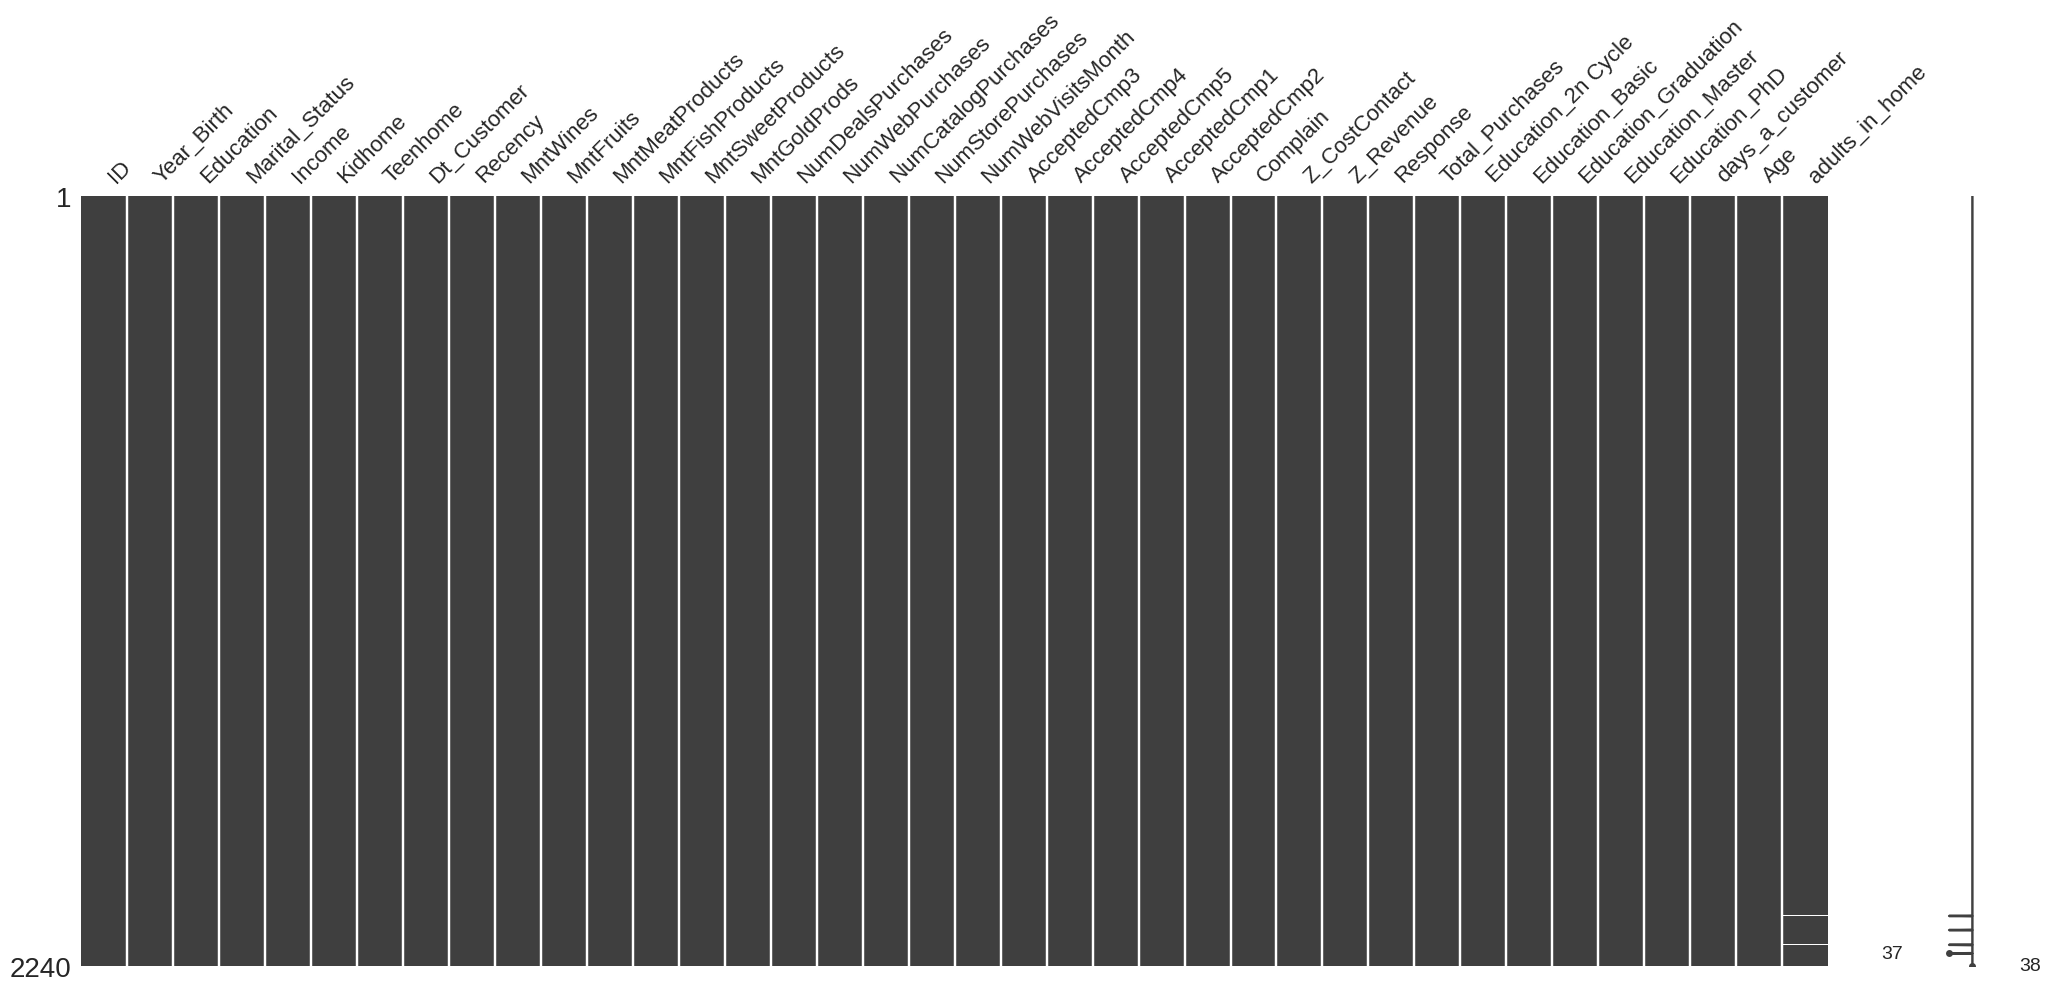

In [393]:
msno.matrix(df, )

In [394]:
#Arash:
df.dropna(axis=0, subset='adults_in_home', inplace= True)

In [395]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [396]:
#Add by Taufiq: feature = Total Number of Purchases a single customer make
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [397]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

In [398]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [399]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
df["IncomePer"] =df["Income"]/df["Family_Size"]

Arash: I removed 'Income' from columns drop list

In [400]:
to_drop = ["Marital_Status", "Dt_Customer","Year_Birth",'Z_CostContact','Z_Revenue']
df= df.drop(to_drop, axis=1)

In [401]:
df["Age"].value_counts()

Age
44    89
49    87
45    83
48    79
50    77
42    77
55    74
47    72
51    71
46    69
64    55
41    53
62    53
68    52
61    51
52    51
43    51
54    50
66    50
65    49
60    49
38    45
57    45
58    44
53    44
69    43
56    42
63    42
37    42
34    42
39    39
40    39
36    38
59    36
67    35
35    32
31    30
71    30
32    29
70    29
33    27
72    21
30    18
73    16
74    16
29    15
28    13
75     8
76     7
77     7
25     5
27     4
26     3
24     2
79     1
80     1
Name: count, dtype: int64

In [402]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

In [403]:
df01 = df.copy()

In [404]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [360]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


# ML by Zohreh?

In [294]:
selected_attributes = ['Education', 'IncomePer', 'Kidhome','Teenhome','Age','Spent','Living_With','Children','Family_Size','Is_Parent','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth']
data1 = df[selected_attributes].copy()

In [295]:
#Scaling
scaler = StandardScaler()
scaler.fit(data1)
data1 = pd.DataFrame(scaler.transform(data1),columns= data1.columns )

print("All features are now scaled")

All features are now scaled


In [296]:
data1.head()

,Education,IncomePer,Kidhome,Teenhome,Age,Spent,Living_With,Children,Family_Size,Is_Parent,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,-0.350808,1.718121,-0.826182,-0.930507,1.016434,1.680059,-1.351043,-1.265157,-1.762182,-1.585863,...,1.555438,1.679390,2.471979,1.474217,0.851478,0.349860,1.407869,2.512794,-0.551703,0.692985
1,-0.350808,-0.483057,1.030855,0.905825,1.272917,-0.961188,-1.351043,1.393818,0.443758,0.630572,...,-0.635838,-0.713142,-0.650500,-0.631773,-0.729668,-0.167627,-1.109762,-0.568454,-1.166481,-0.131944
2,-0.350808,0.566666,-0.826182,-0.930507,0.332478,0.283022,0.740169,-1.265157,-0.659212,-1.585863,...,0.573142,-0.177038,1.351560,-0.147637,-0.035506,-0.685114,1.407869,-0.226093,1.292632,-0.544409
3,-0.350808,-0.821613,1.030855,-0.930507,-1.291916,-0.917998,0.740169,0.064330,0.443758,0.630572,...,-0.560277,-0.651114,-0.503560,-0.583359,-0.748950,-0.167627,-0.750100,-0.910815,-0.551703,0.280520
4,1.430770,-0.277686,1.030855,-0.930507,-1.035433,-0.305029,0.740169,0.064330,0.443758,0.630572,...,0.422019,-0.216914,0.157671,-0.002397,-0.556128,1.384834,0.328884,0.116268,0.063075,-0.131944


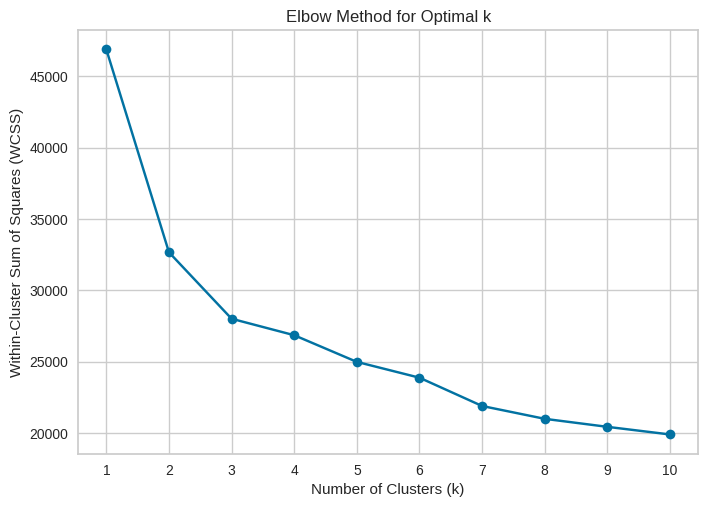

In [297]:
from sklearn.cluster import KMeans

k_values = range(1, 11) 

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

# Iterate over each value of k
for k in k_values:
    # Initialize the k-means clustering algorithm with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the k-means model to the subset data
    kmeans.fit(data1)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()

In [298]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data1)
data1["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

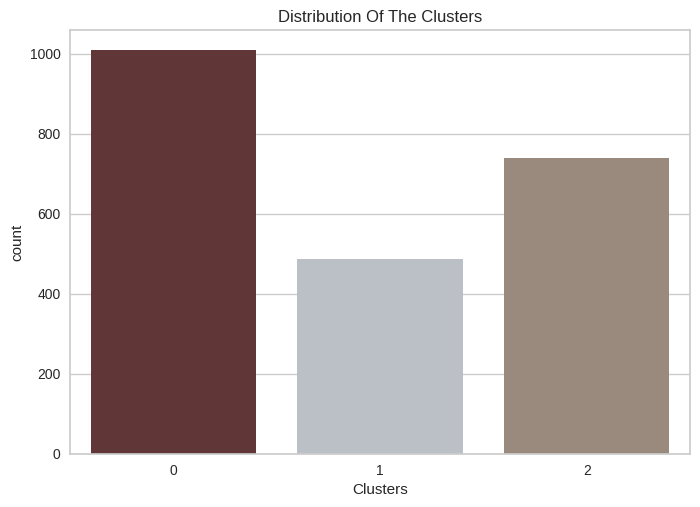

In [299]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

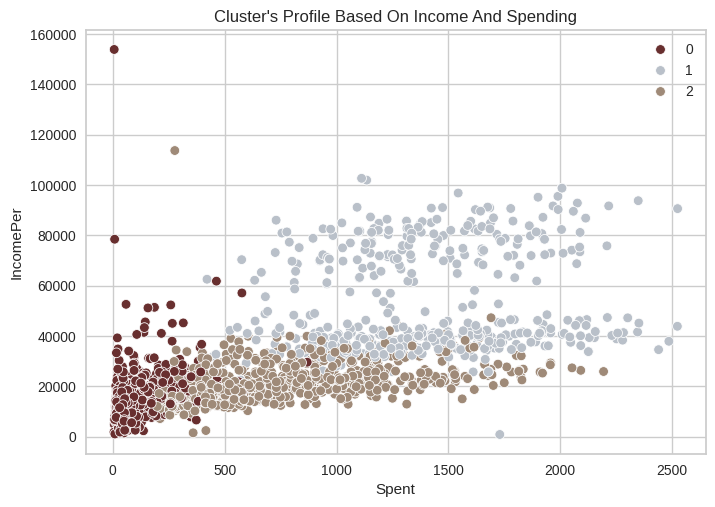

In [300]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["IncomePer"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

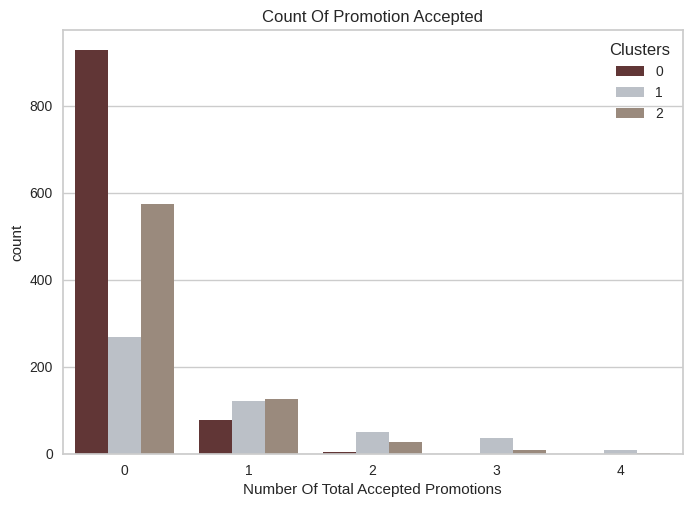

In [301]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

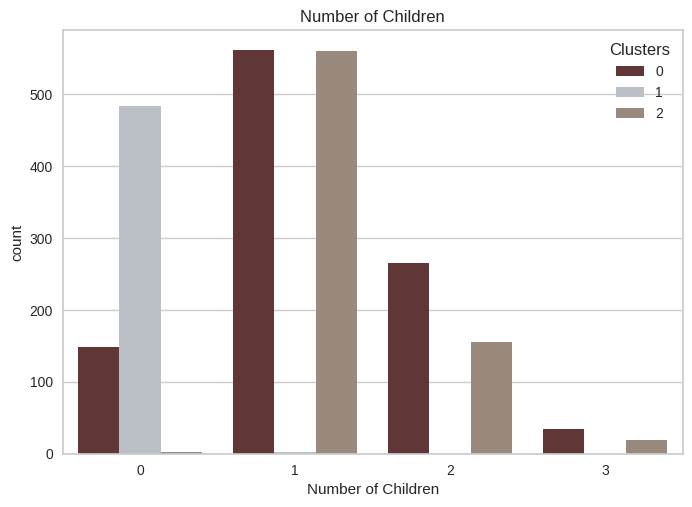

In [302]:
plt.figure()
pl = sns.countplot(x=df["Children"],hue=df["Clusters"], palette= pal)
pl.set_title("Number of Children")
pl.set_xlabel("Number of Children")
plt.show()

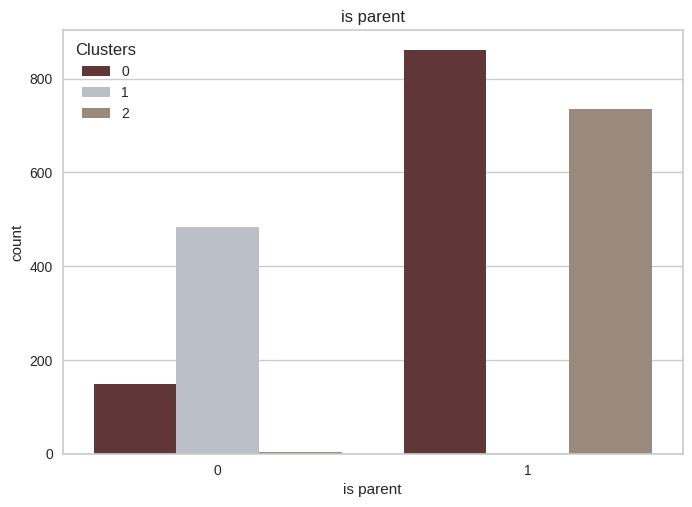

In [303]:
plt.figure()
pl = sns.countplot(x=df["Is_Parent"],hue=df["Clusters"], palette= pal)
pl.set_title("is parent")
pl.set_xlabel("is parent")
plt.show()

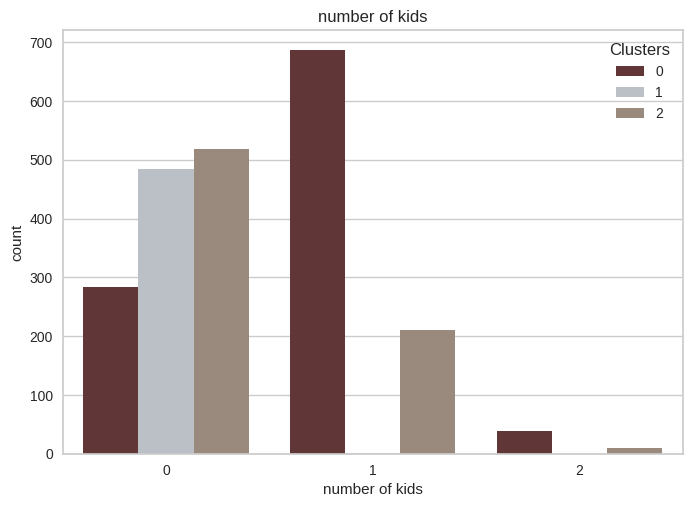

In [304]:
plt.figure()
pl = sns.countplot(x=df["Kidhome"],hue=df["Clusters"], palette= pal)
pl.set_title("number of kids")
pl.set_xlabel("number of kids")
plt.show()

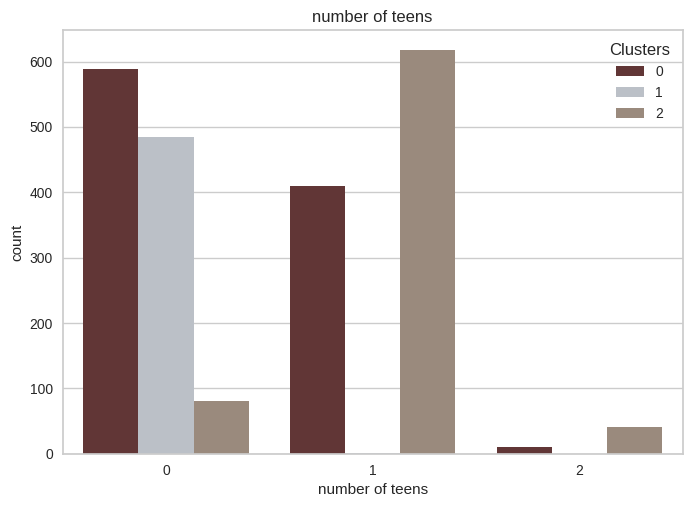

In [305]:
plt.figure()
pl = sns.countplot(x=df["Teenhome"],hue=df["Clusters"], palette= pal)
pl.set_title("number of teens")
pl.set_xlabel("number of teens")
plt.show()

In [306]:
#!pip install mlxtend

In [307]:
#data1.describe()
df.describe()

,ID,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Age,adults_in_home,Spent,Living_With,Children,Family_Size,Is_Parent,IncomePer,Total_Promos,Clusters
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,5588.393817,2.393817,0.444892,0.506720,49.154122,304.065412,26.244624,166.957885,37.415771,27.099014,...,51.111111,1.646057,605.624104,0.646057,0.951613,2.597670,0.715502,24816.493044,0.297491,0.879032
std,3243.397549,1.122851,0.538613,0.544686,28.949677,336.871724,39.711783,225.752900,54.456115,41.320001,...,11.699288,0.478299,602.123276,0.478299,0.752338,0.906846,0.451276,19398.504498,0.678301,0.876338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.000000,1.000000,5.000000,0.000000,0.000000,1.000000,0.000000,815.666667,0.000000,0.000000
25%,2828.250000,2.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,...,43.000000,1.000000,69.000000,0.000000,0.000000,2.000000,0.000000,12160.875000,0.000000,0.000000
50%,5454.500000,2.000000,0.000000,0.000000,49.500000,173.000000,8.000000,67.000000,12.000000,8.000000,...,50.000000,2.000000,396.000000,1.000000,1.000000,3.000000,1.000000,18586.666667,0.000000,1.000000
75%,8421.750000,3.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,...,61.000000,2.000000,1044.250000,1.000000,1.000000,3.000000,1.000000,31910.375000,0.000000,2.000000
max,11191.000000,4.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,80.000000,2.000000,2525.000000,1.000000,3.000000,5.000000,1.000000,153924.000000,4.000000,2.000000


In [308]:
percentile_25 = df['MntSweetProducts'].quantile(0.25)
#print(percentile_75)
#median_value = df['MntGoldProds'].median()
#mean_value = df['MntGoldProds'].mean()
print(percentile_25)

1.0


In [309]:
cluster_means = df.groupby("Clusters").mean()

# Print cluster means
print("Cluster means:")
print(cluster_means)

Cluster means:
                   ID  Education   Kidhome  Teenhome    Recency    MntWines  \
Clusters                                                                      
0         5567.203373   2.258929  0.755952  0.427579  48.846230   41.641865   
1         5650.203704   2.446502  0.002058  0.002058  49.417695  617.106996   
2         5576.632791   2.543360  0.311653  0.947154  49.401084  456.348238   

          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Clusters                                                                 ...   
0          5.254960        23.298611         7.694444          5.366071  ...   
1         64.288066       481.539095        93.325103         64.619342  ...   
2         29.860434       156.012195        41.192412         32.074526  ...   

          days_a_customer        Age  adults_in_home        Spent  \
Clusters                                                            
0              472.446429  48.578373        1.6428

In [310]:
#!pip install pyfpgrowth

In [311]:
import pyfpgrowth

# Define the unique cluster numbers
clusters = df['Clusters'].unique()

# Specify the minimum support threshold
min_support = 0.1
top_supported_itemsets = {}
# Iterate over each cluster
for cluster in clusters:
    # Filter the main dataset for the current cluster
    cluster_data = df[df['Clusters'] == cluster]
    # Convert the cluster data into transaction format
    transactions = []
    for index, row in cluster_data.iterrows():
        # Create a list to store items in the transaction
        transaction = []
        if row['MntWines'] > 175.50:
            transaction.append('wine')
        if row['MntFruits'] > 8:
            transaction.append('fruits')
        if row['MntMeatProducts'] > 68:
            transaction.append('meat')
        if row['MntFishProducts'] > 12:
            transaction.append('fish')
        if row['MntSweetProducts'] >8:
            transaction.append('sweet')
        if row['MntGoldProds'] > 24.5:
            transaction.append('gold')

    transactions.append(transaction)
    
    # Apply FP-Growth algorithm to find frequent itemsets for the current cluster
    patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)
    sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:3]
    top_supported_itemsets[cluster] = sorted_patterns
    # Print frequent itemsets with their support for the current cluster
    print(f"Frequent itemsets for Cluster {cluster}:")
    for itemset, support in patterns.items():
        print(f"Itemset: {itemset}, Support: {support}")
        
    print()


Frequent itemsets for Cluster 1:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1
Itemset: ('fish',), Support: 1
Itemset: ('sweet',), Support: 1
Itemset: ('fruits', 'wine'), Support: 1
Itemset: ('meat', 'wine'), Support: 1
Itemset: ('fish', 'wine'), Support: 1
Itemset: ('sweet', 'wine'), Support: 1
Itemset: ('fruits', 'meat'), Support: 1
Itemset: ('fish', 'fruits'), Support: 1
Itemset: ('fruits', 'sweet'), Support: 1
Itemset: ('fish', 'meat'), Support: 1
Itemset: ('meat', 'sweet'), Support: 1
Itemset: ('fish', 'sweet'), Support: 1
Itemset: ('fruits', 'meat', 'wine'), Support: 1
Itemset: ('fish', 'fruits', 'wine'), Support: 1
Itemset: ('fruits', 'sweet', 'wine'), Support: 1
Itemset: ('fish', 'meat', 'wine'), Support: 1
Itemset: ('meat', 'sweet', 'wine'), Support: 1
Itemset: ('fish', 'sweet', 'wine'), Support: 1
Itemset: ('fish', 'fruits', 'meat'), Support: 1
Itemset: ('fruits', 'meat', 'sweet'), Support: 1
Itemset: ('fish', 'fruits', 'sweet'

In [312]:
for cluster, itemsets in top_supported_itemsets.items():
    print(f"Cluster {cluster}: Top three itemsets with the most support:")
    for itemset, support in itemsets:
        print(f"Itemset: {itemset}, Support: {support}")
    print()

Cluster 1: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

Cluster 0: Top three itemsets with the most support:

Cluster 2: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1



In [313]:
min_support = 0.1
top_supported_itemsets = {}
# Iterate over each cluster
for cluster in clusters:
    # Filter the main dataset for the current cluster
    cluster_data = df[df['Clusters'] == cluster]
    # Convert the cluster data into transaction format
    transactions = []
    for index, row in cluster_data.iterrows():
        # Create a list to store items in the transaction
        transaction = []
        if row['MntWines'] > 24:
            transaction.append('wine')
        if row['MntFruits'] > 2:
            transaction.append('fruits')
        if row['MntMeatProducts'] > 16:
            transaction.append('meat')
        if row['MntFishProducts'] > 3:
            transaction.append('fish')
        if row['MntSweetProducts'] > 1:
            transaction.append('sweet')
        if row['MntGoldProds'] > 1:
            transaction.append('gold')

    transactions.append(transaction)
    
    # Apply FP-Growth algorithm to find frequent itemsets for the current cluster
    patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)
    sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:3]
    top_supported_itemsets[cluster] = sorted_patterns
    # Print frequent itemsets with their support for the current cluster
    print(f"Frequent itemsets for Cluster {cluster}:")
    for itemset, support in patterns.items():
        print(f"Itemset: {itemset}, Support: {support}")
        
    print()


Frequent itemsets for Cluster 1:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1
Itemset: ('fish',), Support: 1
Itemset: ('sweet',), Support: 1
Itemset: ('gold',), Support: 1
Itemset: ('fruits', 'wine'), Support: 1
Itemset: ('meat', 'wine'), Support: 1
Itemset: ('fish', 'wine'), Support: 1
Itemset: ('sweet', 'wine'), Support: 1
Itemset: ('gold', 'wine'), Support: 1
Itemset: ('fruits', 'meat'), Support: 1
Itemset: ('fish', 'fruits'), Support: 1
Itemset: ('fruits', 'sweet'), Support: 1
Itemset: ('fruits', 'gold'), Support: 1
Itemset: ('fish', 'meat'), Support: 1
Itemset: ('meat', 'sweet'), Support: 1
Itemset: ('gold', 'meat'), Support: 1
Itemset: ('fish', 'sweet'), Support: 1
Itemset: ('fish', 'gold'), Support: 1
Itemset: ('gold', 'sweet'), Support: 1
Itemset: ('fruits', 'meat', 'wine'), Support: 1
Itemset: ('fish', 'fruits', 'wine'), Support: 1
Itemset: ('fruits', 'sweet', 'wine'), Support: 1
Itemset: ('fruits', 'gold', 'wine'), Support: 1


In [314]:
for cluster, itemsets in top_supported_itemsets.items():
    print(f"Cluster {cluster}: Top three itemsets with the most support:")
    for itemset, support in itemsets:
        print(f"Itemset: {itemset}, Support: {support}")
    print()

Cluster 1: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

Cluster 0: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

Cluster 2: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1



# ML by Arash

In [406]:
df01['Living_With']=LE.fit_transform(df01['Living_With'])

In [407]:
df01.columns

Index(['ID', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Total_Purchases', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'days_a_customer', 'Age', 'adults_in_home', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent', 'IncomePer', 'Total_Promos'],
      dtype='object')

<BarContainer object of 2 artists>

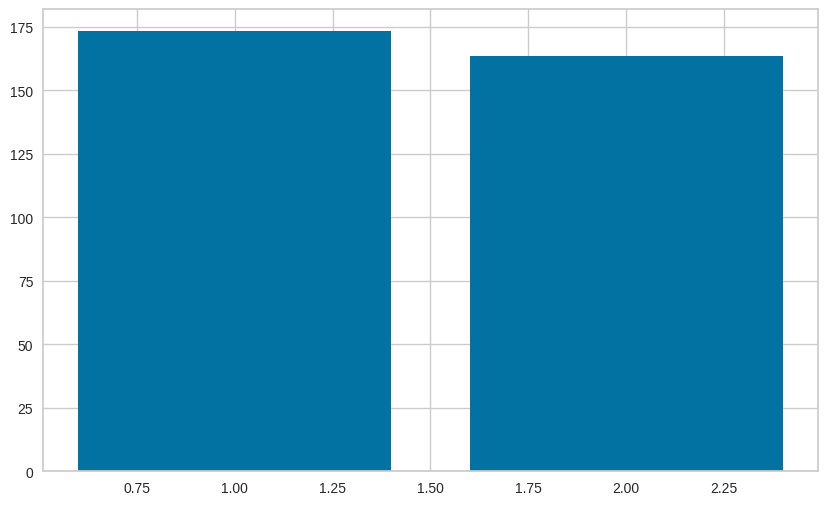

In [437]:
income_mean = df01.groupby('adults_in_home')['MntMeatProducts'].mean()
plt.figure(figsize=(10,6))
plt.bar(income_mean.index, income_mean.values)

In [438]:
selected_attributes_01 = ['IncomePer', 'Kidhome','Teenhome','Spent','Children','Family_Size','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases']
MLdata01 = df01[selected_attributes_01].copy()

In [ ]:
scaler = StandardScaler()
scaler.fit(MLdata01)
MLdata01 = pd.DataFrame(scaler.transform(MLdata01),columns= MLdata01.columns )

# ML by ?